In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the train data directory
train_dir = '/content/drive/MyDrive/data/train'  # Ensure this path points to your train data

# Create an ImageDataGenerator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator (80% of the data)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data generator (20% of the data)
validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.5658 - loss: 0.6719 - val_accuracy: 0.7700 - val_loss: 0.8143
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9113 - loss: 0.2396 - val_accuracy: 0.8800 - val_loss: 0.3678
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9774 - loss: 0.0668 - val_accuracy: 0.8900 - val_loss: 0.3482
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9924 - loss: 0.0207 - val_accuracy: 0.9100 - val_loss: 0.2724
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9887 - loss: 0.0247 - val_accuracy: 0.8850 - val_loss: 0.4836
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9792 - loss: 0.0635 - val_accuracy: 0.9100 - val_loss: 0.3680
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9933 - loss: 0.0176 - val_accuracy: 0.9550 - val_loss: 0.1829
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9000 - val_loss: 0.4846
Ep

In [ ]:
# Predictions on validation data
val_preds = model.predict(validation_data)
val_preds = np.where(val_preds > 0.5, 1, 0)

# True labels
y_true = validation_data.classes

# Performance Metrics
accuracy = accuracy_score(y_true, val_preds)
precision = precision_score(y_true, val_preds)
recall = recall_score(y_true, val_preds)
f1 = f1_score(y_true, val_preds)
report = classification_report(y_true, val_preds, target_names=['Healthy', 'Anthracnose'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step
Accuracy: 0.49
Precision: 0.49019607843137253
Recall: 0.5
F1 Score: 0.49504950495049505

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.49      0.48      0.48       100
 Anthracnose       0.49      0.50      0.50       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



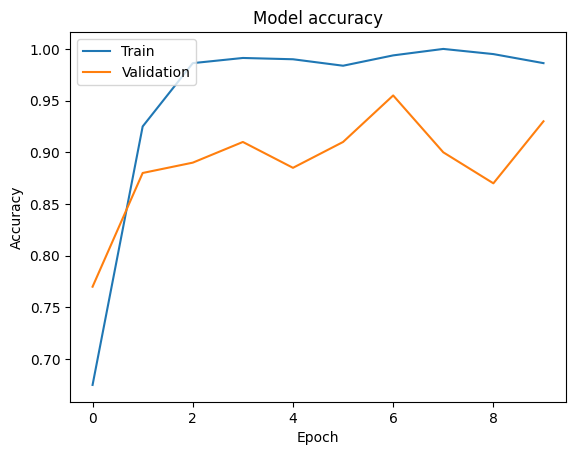

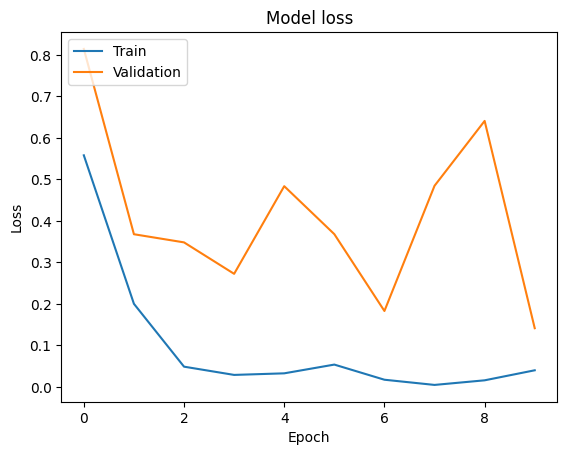

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
